<a href="https://colab.research.google.com/github/Godwin-Anku/ML_drug_approval_rate/blob/main/Drug_Approval_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.feature_extraction.text
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [105]:
drug_df = pd.read_csv("/content/Medicine_Details.csv")
drug_df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [106]:
drug_df.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


In [107]:
drug_df.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [108]:
df_cols = drug_df.columns
drug_df.columns

Index(['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Image URL',
       'Manufacturer', 'Excellent Review %', 'Average Review %',
       'Poor Review %'],
      dtype='object')

In [109]:
drug_df.dtypes

Medicine Name         object
Composition           object
Uses                  object
Side_effects          object
Image URL             object
Manufacturer          object
Excellent Review %     int64
Average Review %       int64
Poor Review %          int64
dtype: object

In [110]:
def plot_distribution():
  plt.figure(figsize = (12, 3))
  plot_data = ["Excellent Review %", "Average Review %", "Poor Review %"]

  for i in range(len(plot_data)):
    plt.subplot(1, 3, i+1)
    plt.title(plot_data[i], fontweight = "bold")
    plt.hist(drug_df[plot_data[i]], bins = 20)
    plt.grid(True)
    plt.ylabel("Frequency", fontstyle = "italic")
    plt.xlabel(plot_data[i], fontstyle = "italic")
    plt.gca().spines[["top", "right"]].set_visible(False)

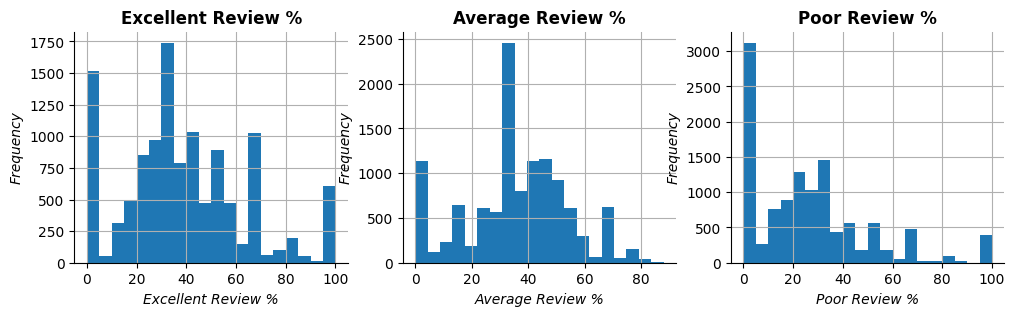

In [111]:
plot_distribution()

In [112]:
drug_df[["Excellent Review %", "Poor Review %"]] = StandardScaler().fit_transform(drug_df[["Excellent Review %", "Poor Review %"]])
drug_df.head()


,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,-0.654767,56,-0.155376
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,0.336342,35,-0.322105
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,0.019187,40,-0.197058
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,-0.575478,41,0.386495
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,-0.179035,37,0.136401


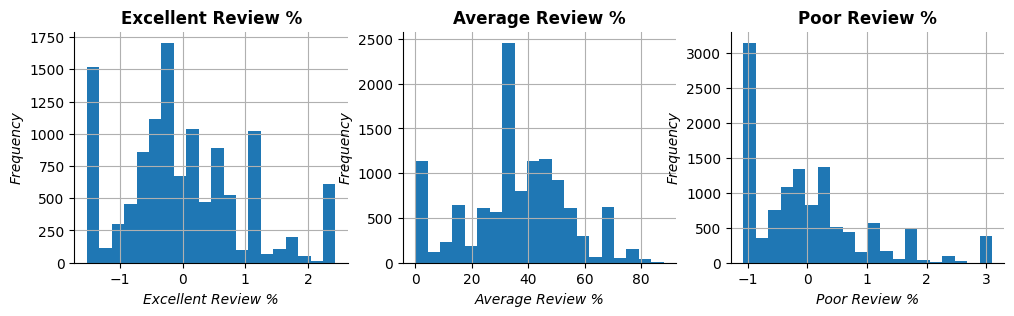

In [113]:
plot_distribution()

In [114]:
print(f"Number of rows: {drug_df.shape[0]}\n\nNumber of columns: {drug_df.shape[1]}")

Number of rows: 11825

Number of columns: 9


**Columns containing object data**

In [115]:
object_cols = [col for col in drug_df.columns if drug_df[col].dtype == "object"]
object_cols

['Medicine Name',
 'Composition',
 'Uses',
 'Side_effects',
 'Image URL',
 'Manufacturer']

In [116]:
numeric_cols = [cname for cname in drug_df.columns if drug_df[cname].dtype in ["int64", "float64"]]
numeric_cols

['Excellent Review %', 'Average Review %', 'Poor Review %']

In [117]:
drug_df.drop(["Composition", "Image URL"], inplace = True, axis = 1)
drug_df.head()

,Medicine Name,Uses,Side_effects,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,Roche Products India Pvt Ltd,-0.654767,56,-0.155376
1,Augmentin 625 Duo Tablet,Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,Glaxo SmithKline Pharmaceuticals Ltd,0.336342,35,-0.322105
2,Azithral 500 Tablet,Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,Alembic Pharmaceuticals Ltd,0.019187,40,-0.197058
3,Ascoril LS Syrup,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,Glenmark Pharmaceuticals Ltd,-0.575478,41,0.386495
4,Aciloc 150 Tablet,Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,Cadila Pharmaceuticals Ltd,-0.179035,37,0.136401


In [118]:
drug_df.columns

Index(['Medicine Name', 'Uses', 'Side_effects', 'Manufacturer',
       'Excellent Review %', 'Average Review %', 'Poor Review %'],
      dtype='object')

In [119]:
len(drug_df.columns)

7

In [120]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_features = 1000)

In [121]:
def vectorizer_transform(original_data):
  transformed_data = vectorizer.fit_transform(original_data.fillna("")).toarray()
  return transformed_data

In [122]:
medicine_name_tfidf = vectorizer_transform(drug_df["Medicine Name"])
uses_of_drug_tfidf = vectorizer_transform(drug_df["Uses"])
side_effects_tfidf = vectorizer_transform(drug_df["Side_effects"])
manufacturer_tfidf = vectorizer_transform(drug_df["Manufacturer"])

In [123]:
uses_of_drug_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
print(f"Dimensions of 'Medicine Name': {medicine_name_tfidf.shape}")
print(f"Dimensions of 'Uses of drug': {uses_of_drug_tfidf.shape}")
print(f"Dimensions of 'Side effects': {side_effects_tfidf.shape}")
print(f"Dimensions of 'Manufacturer': {manufacturer_tfidf.shape}")

Dimensions of 'Medicine Name': (11825, 1000)
Dimensions of 'Uses of drug': (11825, 728)
Dimensions of 'Side effects': (11825, 782)
Dimensions of 'Manufacturer': (11825, 889)


In [125]:
features = np.hstack((medicine_name_tfidf, uses_of_drug_tfidf, side_effects_tfidf,
                      manufacturer_tfidf,))

In [126]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
features.shape

(11825, 3399)

In [128]:
drug_df.head()

,Medicine Name,Uses,Side_effects,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,Roche Products India Pvt Ltd,-0.654767,56,-0.155376
1,Augmentin 625 Duo Tablet,Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,Glaxo SmithKline Pharmaceuticals Ltd,0.336342,35,-0.322105
2,Azithral 500 Tablet,Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,Alembic Pharmaceuticals Ltd,0.019187,40,-0.197058
3,Ascoril LS Syrup,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,Glenmark Pharmaceuticals Ltd,-0.575478,41,0.386495
4,Aciloc 150 Tablet,Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,Cadila Pharmaceuticals Ltd,-0.179035,37,0.136401


In [129]:
extracted_features = drug_df.drop(columns = ["Medicine Name", "Uses", "Side_effects", "Manufacturer", "Excellent Review %"]).values

In [130]:
extracted_features

array([[56.        , -0.15537558],
       [35.        , -0.32210498],
       [40.        , -0.19705793],
       ...,
       [75.        , -1.07238727],
       [ 0.        ,  3.09584767],
       [ 0.        ,  3.09584767]])

In [131]:
extracted_features.shape

(11825, 2)

In [132]:
final_features = np.hstack((features, extracted_features))

In [133]:
final_features

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        56.        , -0.15537558],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        35.        , -0.32210498],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        , -0.19705793],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        75.        , -1.07238727],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.09584767],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.09584767]])

In [134]:
final_features.shape

(11825, 3401)

In [135]:
y_target_full = drug_df["Excellent Review %"].values

In [136]:
y_target_full

array([-0.65476706,  0.33634165,  0.01918686, ..., -0.53583402,
       -1.52694273, -1.52694273])

In [137]:
y_target_full.shape

(11825,)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(final_features, y_target_full, test_size = 0.2, random_state = 42)

In [139]:
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of y_train: {y_train.shape}")

Dimensions of X_train: (9460, 3401)
Dimensions of y_train: (9460,)


In [140]:
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [141]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [142]:
y_predict = model.predict(X_test)

In [143]:
def model_performance(y_test, y_predict):
  mae = mean_absolute_error(y_test, y_predict)
  mse = mean_squared_error(y_test, y_predict)
  r2 = r2_score(y_test, y_predict)
  rmse = np.sqrt(mse)
  return mae, mse, rmse, r2
  # print(f"Mean Absolute Error: {mae}")
  # print(f"Mean Squared Error: {mse}")
  # print(f"Root Mean Squared Error: {rmse}")
  #print(f"R2 score: {r2}")

In [144]:
m_a_e, m_s_e, r_m_s_e, r_2 = model_performance(y_test, y_predict)

In [145]:
print(f"Mean Absolute Error: {m_a_e}")
print(f"Mean Squared Error: {m_s_e}")
print(f"Root Mean Squared Error: {r_m_s_e}")
print(f"R2 Score: {r_2}")

Mean Absolute Error: 0.008544874113879301
Mean Squared Error: 0.0004903383845504577
Root Mean Squared Error: 0.022143585629939375
R2 Score: 0.9995207210846723


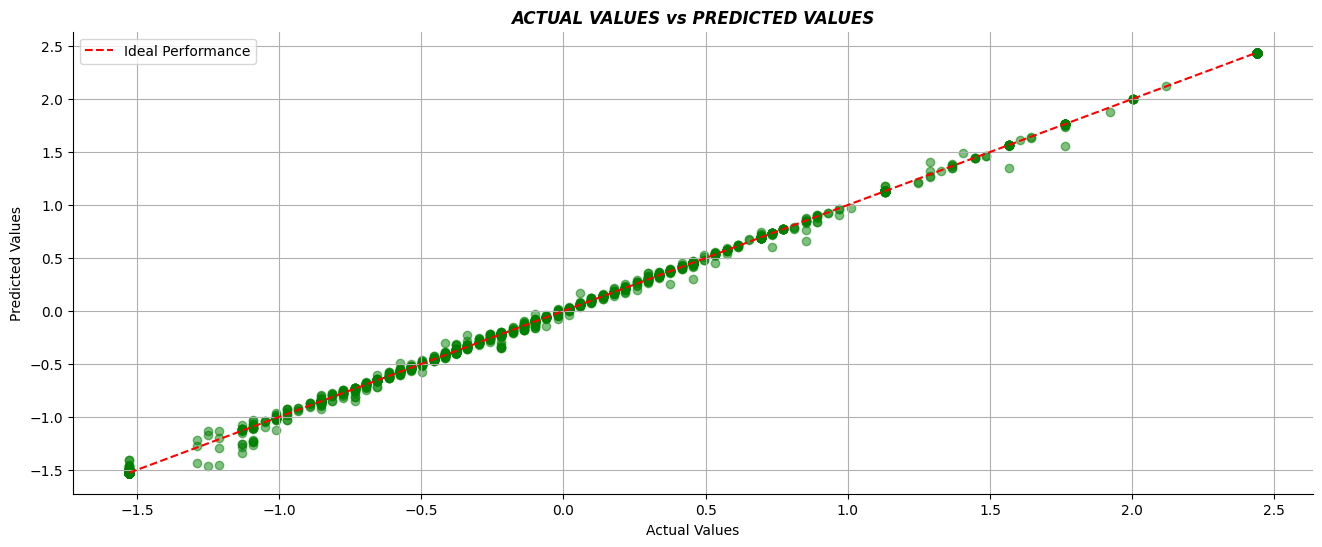

In [146]:
plt.figure(figsize = (16, 6))
plt.scatter(y_test, y_predict, alpha = 0.5, color = "g")
minimum_value = min(min(y_test), min(y_predict))
maximum_value = max(max(y_test), max(y_predict))
plt.plot([minimum_value, maximum_value], [minimum_value, maximum_value], "--r", label = "Ideal Performance")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ACTUAL VALUES vs PREDICTED VALUES", fontstyle = "italic", fontweight = "bold")
plt.grid(True)
plt.legend()
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()